# Linear Regression with Tensorflow

### Linear Regression
It is the approximation of linear model used to describe the relationship between two or more variables
+ Dependent Variable = Final Goal
+ Independent Variable = Cause/State

### *when there are more than one Independent Variable present, then the process is Multiple Linear Regression

### *when Multiple Dependent Variable are predicted, then the process is called Multivariate Linear Regression

### Equation :
### Y = a* X + b

+ Y = Dependent Variable
+ X = Independent Variable
+ a = slope
+ b = intercept

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

Define Independent Variables

In [2]:
X = np.arange(0.0, 5.0,0.1)

In [3]:
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

Plot the Line

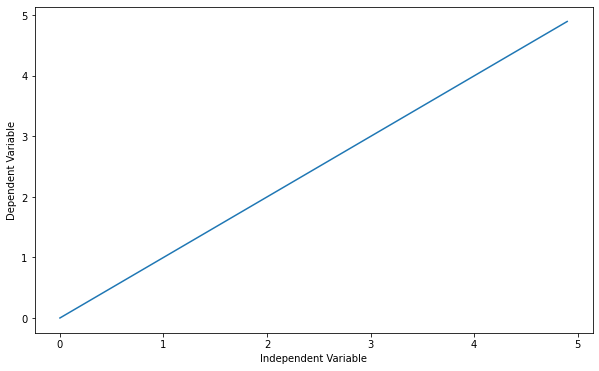

In [4]:
a = 1
b = 0

Y = a * X + b

plt.plot(X,Y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

### Linear Regression with Tensorflow

In [5]:
import tensorflow as tf

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

### 1.Download Dataset
Dataset is related to Fuel Consumption and CO2 Emission of cars

In [6]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### 2. Understand the Data

+ Modelyear
+ make
+ model
+ vehicleclass
+ enginesize
+ cylinders
+ transmission
+ fueltype
+ fuelconsumption_city
+ fuelconsumptioin_hwy
+ fuelconsumption_comb
+ fuelconsumption_comb_mpg
+ co2emission

these are the columns that constisting of the dataset

### 3.Define the Problem
Build a Linear Regression Model to predict CO2Emission of cars based on their EngineSize
+ Define X and Y as train_x and train_y

In [17]:
train_x = np.asanyarray(df[["ENGINESIZE"]])
train_y = np.asanyarray(df[["CO2EMISSIONS"]])

In [18]:
train_x.shape

(1067, 1)

In [19]:
train_y.shape

(1067, 1)

### 4.Initialize the Variable
Initialize the variable with some random guess
+ Then Define Linear Function

In [20]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

In [21]:
y = a * train_x + b

### 5. Define a Loss Function
Define a Loss Function to train the model to better fit the data
+ In Linear Regression, the Objective is to minimize the squarred error of the difference between the predicted value (from equation) and target value (current data).
+ Define the equation to be minimized as loss

Use tf.reduce_mean()
+ This function finds the mean of multi dimensional tensors, the result can have a different dimension

In [22]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [23]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

### 6.Define Optimizer Method
+ The Gradient Descent Optimizer takes in parameter: Learning Rate
+ Learning Rate : The Speed with which the optimizer should learn

Pros and Cons of Learning Rate:
+ High Learning Rate:
    + training model converges quickly
    + When Learning Rate is high it causes instability
+ Low Learning Rate:
    + Reduce Convergence Speed
    + Increase the chance of converging to a solution
    + The Solution might not be a global optimal solution as there is chance that the optimizer will get stuck in a local optimal solution

In [24]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [25]:
optimizer

### 7. Define Training Method of Graph
+ Use .minimize() which will minimize the error function of the optimizer, resulting in a better model.

In [26]:
train = optimizer.minimize(loss)

In [27]:
train

<tf.Operation 'GradientDescent' type=NoOp>

### 8. Initialize the Variables Before Executing Graph

In [28]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### 9. Start the Optimization and Run the Graph

In [29]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.594 77.07106 46.110275
5 1891.7205 58.84462 47.59573
10 1762.7241 57.65104 53.019833
15 1653.5897 56.36652 58.023922
20 1559.0441 55.172844 62.68204
25 1477.1372 54.061794 67.01765
30 1406.179 53.027664 71.05309
35 1344.7057 52.065136 74.809135
40 1291.4506 51.169243 78.30512
45 1245.3145 50.33538 81.559074
50 1205.3451 49.55925 84.58775
55 1170.7189 48.83685 87.40674
60 1140.7214 48.164467 90.03055
65 1114.734 47.53864 92.472694
70 1092.2203 46.956135 94.74576
75 1072.7163 46.413967 96.86146
80 1055.8193 45.909332 98.83067
85 1041.1812 45.439632 100.66355
90 1028.4996 45.002453 102.36953
95 1017.5135 44.595547 103.95739


Plot the loss values and analyse how it has changed during Learning

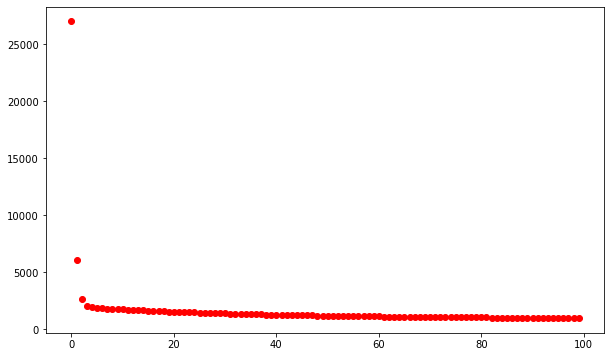

In [30]:
plt.plot(loss_values, 'ro')

Visualize how the Coefficient and Intercept of Line has changed to fit the data

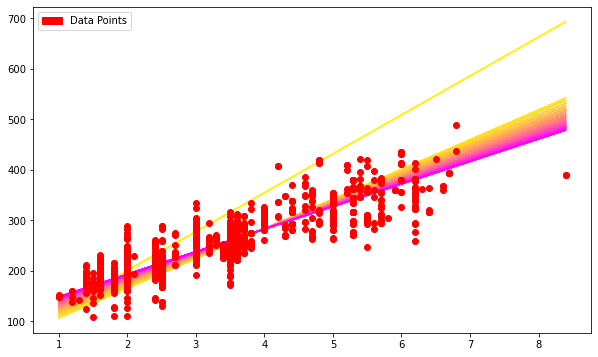

In [32]:
import matplotlib.patches as mpatches
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()